
# Optional 1: Physics
---
- If you want to (and have time for) a more complete modelling of a beamline, explore the following exercises to extend the capabilities of our simple toolbox. 
- **Note 1:** A basic knowledge of Python and some programming experience is required!
- **Note 2:** We suggest to extend your library by filling the gaps of [tracking_library_advanced.py](./tracking_library_advanced.py) after having tested your functions inside the notebook...
---

#### Setup of your Python kernel
Let's load the basic library functions, and setup matplotlib for nice inline plots

In [2]:
# Import custom tracking functions and useful libraries
from tracking_library import *

# Set up plotting
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (15, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

### Exercise 1.1Ph

1. Extend the library toolbox by implementing a **thick quadrupole** element (call it `Qthick`), to be build as a function of its normalised strength $K1$ and length $L$.
2. Build again a simple beamline made by a **thick** quadrupole of **20 cm length** of focal length $f = 2$ m followed by a drift of length $L=f=2$ m. Track again a few particles with zero angles and different offsets. Do all particles still end with $x=0$?

- **Hint:** Remember that the relationship between focal length $f$ and integrated quadrupoles strenght $K1 L$ is:

\begin{equation}
f = \frac{1}{K1 \times L}
\end{equation}

- **Python Hint:**: develop/copy your `Qthick` element into `tracking_library_advanced.py` so to have it available for later


#### SOLUTION

Text(0, 0.5, 'Final x_1 [mm]')

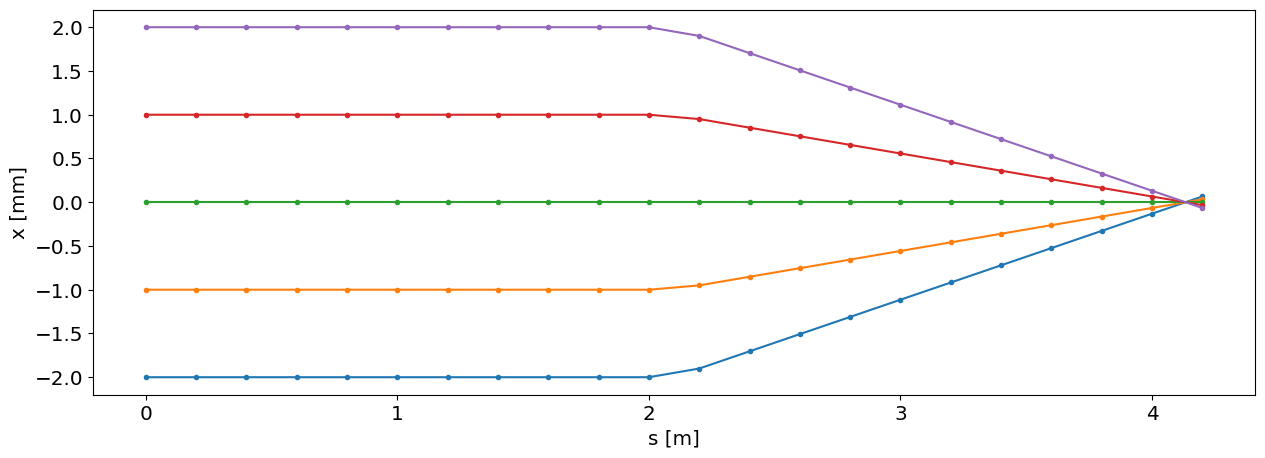

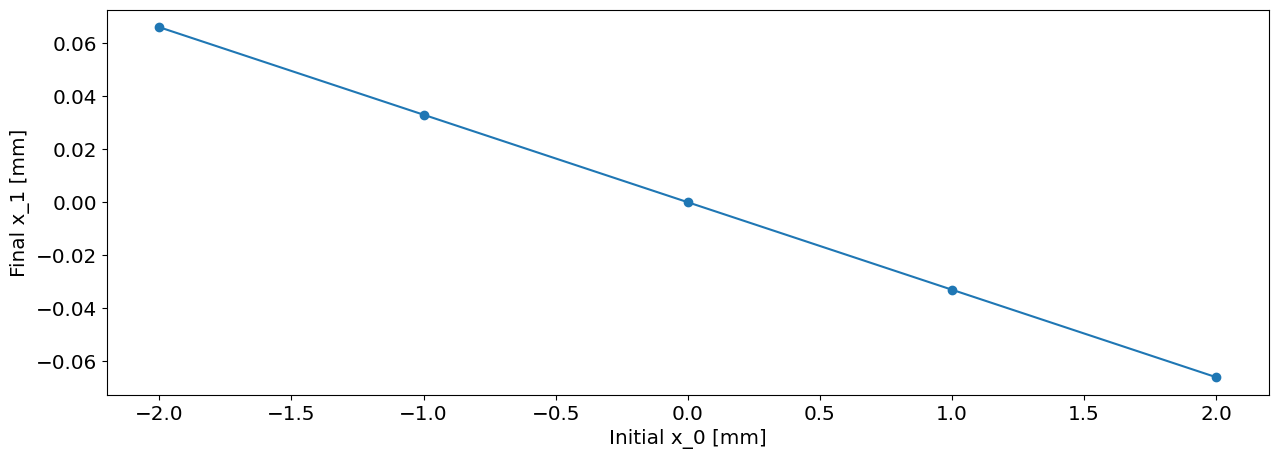

In [3]:
from tracking_library_advanced_solution import Qthick

# Particles definition:
X_0 = np.array([[-2, -1, 0, 1, 2], [0, 0, 0, 0, 0]])

# Beamline definition:
f = 2  # [m]
Lq = 0.2  # [m]
K1 = 1 / (f * Lq)
beamline = 10 * D(f / 10) + Qthick(K1, Lq) + 10 * D(f / 10)

# tracking
tracked_data = transportParticles(X_0, beamline)

# plotting as a function of s along the beamline
plt.figure()
plt.plot(tracked_data["s"], tracked_data["x"], ".-")
plt.xlabel("s [m]")
plt.ylabel("x [mm]")

# plotting of final x coordinate as a function of initial one
plt.figure()
plt.plot(tracked_data["x"][0, :], tracked_data["x"][-1, :], "o-")
plt.xlabel("Initial x_0 [mm]")
plt.ylabel("Final x_1 [mm]")

- **Note:** The final $x$ coordinate is not 0 anymore! The focal length is `exact` only in the limit of thin lens approximation, otherwise the thickness of the quadrupole itself has to be taken into account!

### Exercise 1.2Ph: Imaging equation
Recall that the **imaging equation** for a lens is $1/b+1/g=1/f,$ which corresponds to a system of one focusing lens with focal length $f,$ sandwiched between drift spaces with lengths $b$ and $g$.

1. Write a beamline description that corresponds to this system, with, for example, $b=3$ m and $g=2$ m.
2. Prove that the particles starting with a random angle $x'_0$ and zero position $x$ are focused back to the end of such a system.
   
   > 👀 **HINT**: you can create a random ensample of particles with such properties as
   >
   > `X = np.array([np.zeros(n_particles),np.random.randn(n_particles)])`
   >
   > where `n_particles` is the numbers of particles you want to generate.

4. (Optional) Try to change the position of the quadrupole, i.e. $b$, while keeping fixed the total length of the imaging system (i.e. $b+g=5$ m). Plot both position and angle trajectory for one particle with $x=0$ and $x'_0=1$ mrad for different values of $b$, and show that, with an approriate change of $f$, this particle is always focused back to $x=0$ at the end of system, but what happens to the angle?

    > 👀 **HINT**: for this exercise it is useful to make a small animation with the `interactive` package. 

### Solution for 1.

In [5]:
# our parameters and beamline description
b = 3
g = 2
f = 1 / (1 / b + 1 / g)
beamline = D(b) + Q(f) + D(g)

### Solution for 2.

Text(0, 0.5, 'x [mm]')

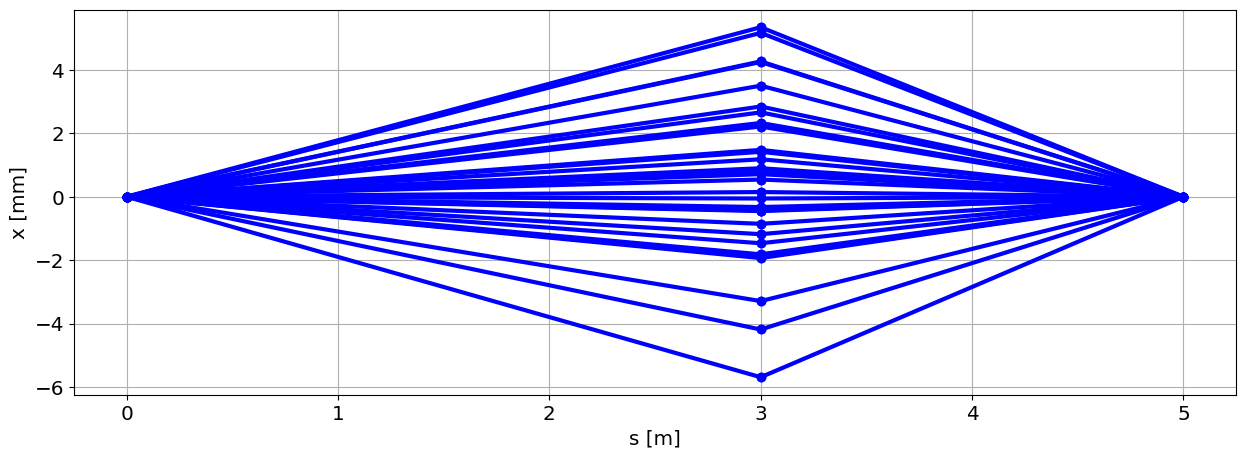

In [6]:
# define several particles with a random angle and zero position
n_particles = 30
X = np.array([np.zeros(n_particles), np.random.randn(n_particles)])
# track the particles and plot the output
transported_particles = transportParticles(X, beamline)

plt.plot(transported_particles["s"], transported_particles["x"], "o-b", lw=3)
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("x [mm]")

### Solution for 3.
We can do a small animation showing that, moving the position of the quadruple and keeping fulfilled the imaging equation the particle entering with x=0 will exit with x=0.

We will see that the closer will be the quadrupole to the end of the system, the larger will be the angle.

In [7]:
# we define the function to be-executed at every change of `b`:
def plot_function(b):
    L = 5
    g = L - b
    f = 1 / (1 / b + 1 / g)
    beamline = D(b) + Q(f) + D(g)

    X = np.array([[0], [1]])
    transported_particles = transportParticles(X, beamline)

    plt.plot(transported_particles["s"], transported_particles["x"], "o-b", lw=3)
    plt.grid(True)
    plt.xlabel("s [m]")
    plt.ylabel("x [mm]", color="b")
    plt.tick_params(axis="y", labelcolor="b")
    plt.ylim([-1, 4.5])

    # Note: After having plotted $x$ trajectory on a plot, one can create a second vertical axis that shares the same horizontal axis with `plt.twinx()`
    ax2 = plt.twinx()
    plt.ylabel("x' [mrad]", color="r")
    plt.tick_params(axis="y", labelcolor="r")
    plt.plot(transported_particles["s"], transported_particles["xp"], "s-r", lw=3)
    plt.ylim([-5, 5])


# create the interactive plot with a range of `b` parameter
interactive_plot = interactive(plot_function, b=(0.1, 4.9, 0.1), continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = "350px"
display(interactive_plot)

interactive(children=(FloatSlider(value=2.5000000000000004, description='b', max=4.9, min=0.1), Output(layout=…